In [1]:
import bff
from pathlib import Path

In [2]:
main_dir = Path('../').resolve()

fn_specs = main_dir / '04-qoi/qoi-specs.yml'
fn_train = [
    dict(
        inputs = main_dir / '04-qoi/qoi-inputs.npy',
        outputs = main_dir / '04-qoi/qoi-train.npz',
        outputs_ref = main_dir / '04-qoi/qoi-ref.npz',
        observations = main_dir / '04-qoi/qoi-observations.npz',
        settings = main_dir / '04-qoi/qoi-settings.yaml'
    )
]

fn_hyper = {
    'rdf': main_dir / '04-optimization/hyper-rdf.yaml',
    'hbond': main_dir / '04-optimization/hyper-hb.yaml',
    'restraint': main_dir / '04-optimization/hyper-restr.yaml',
}

train_data = [bff.structures.TrainData(**t) for t in fn_train]

# Run optimization
optimizer = bff.BFFOptimizer(*train_data, specs=fn_specs)
optimizer.setup_LGP(fn_hyper=fn_hyper)
results = optimizer.run()

# Uncomment if the results are generated outside of this script
# fn_chain = '../05-optimization/mcmc.h5'
# fn_priors  = '../05-optimization/priors.yml'
# fn_tau = '../05-optimization/tau.npy'
# fn_specs = '../04-qoi/qoi-specs.yml'
# results = bff.structures.OptimizationResults(fn_chain, fn_priors, fn_tau, fn_specs)

In [3]:
results.get_chain()

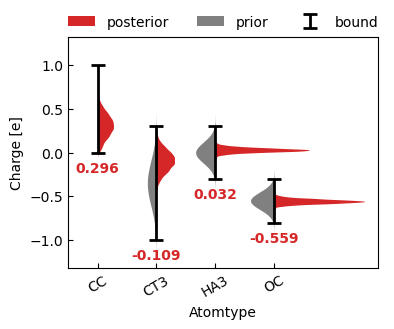

In [13]:
bff.postprocessing.plot_distributions(results)

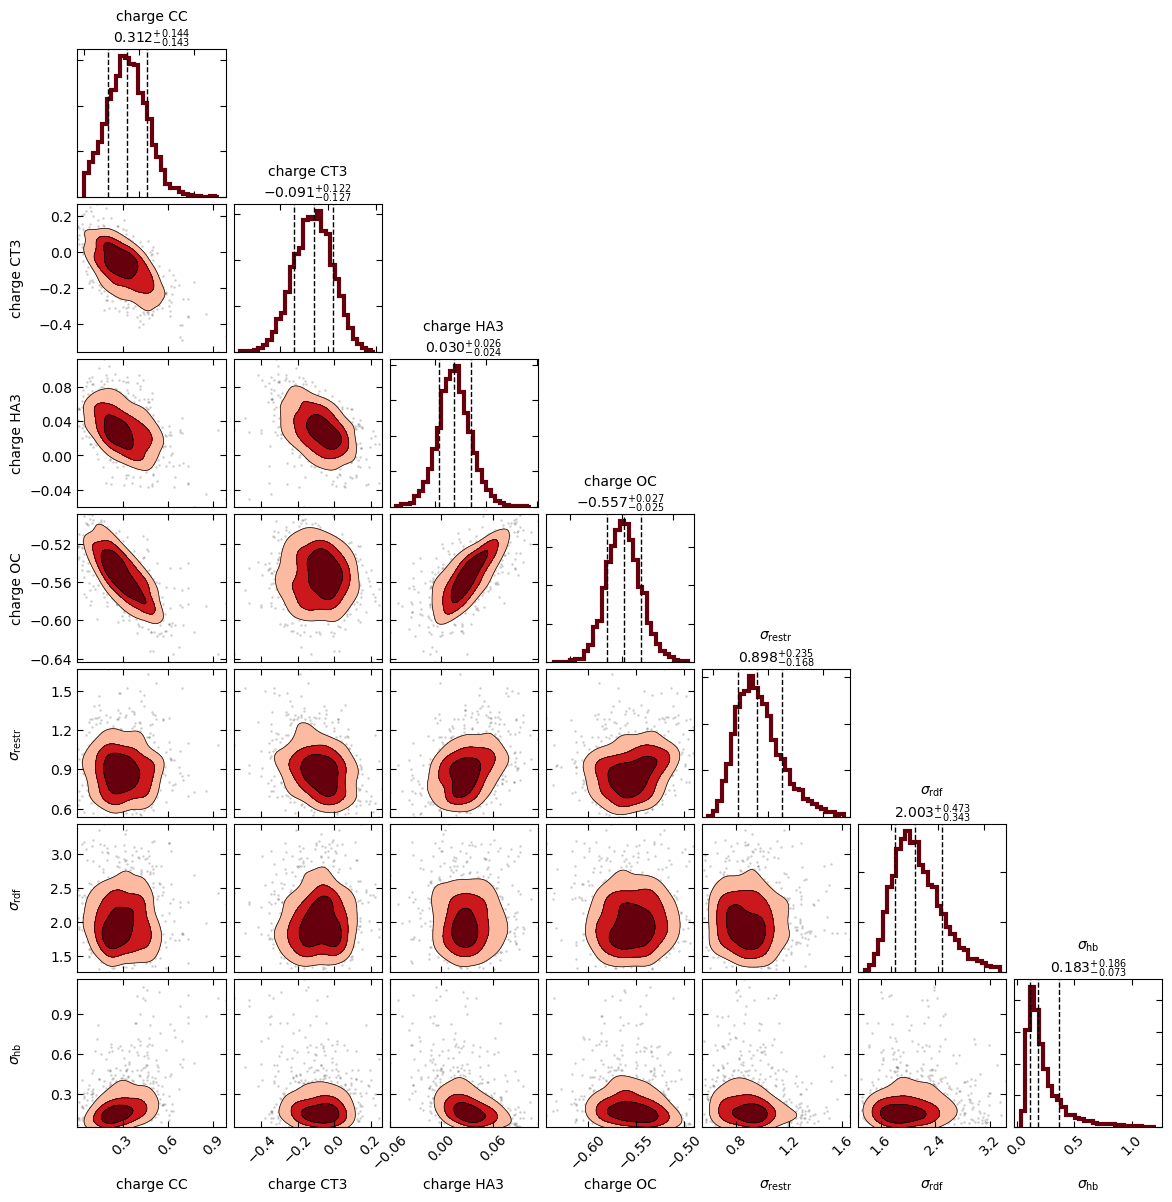

In [14]:
bff.postprocessing.plot_corner(results.chain_explicit_, results.labels_explicit_)